In this part of the assignment, we are going to implement an XORnet. 

![The XOR Truth Table](https://cdn-images-1.medium.com/max/1600/1*Xp1D32f-br8RCng5gjZMCA.gif)

XOR is a problem that is not linearly separable, it means we need a hidden layer in our network. 

![XOR is not linearly separable](http://web.science.mq.edu.au/~cassidy/comp449/html/xor.gif)

The network we are going implement below will use sigmoid function as activation and we are going to use Mean Squared Error as the loss. 


**Network design**

The network has three layers:


*  Input Layer (Taking two input A,B and a bias): This has a size of 3
*  Hidden Layer (you can change the number of neuron in this layer)
* Output Layer: This has a size of 1 as we are generating a single number for every input


**Functions to implement **

* forward(): That takes the current inputs, passes it through the network and generates and output y_hat
* backward(): That does back-propagation to update weight. The sigmoid function and its derivative are provided. You have to derive the gradients **dW1** and **dW2** to updates weights *W1* and *W2*. The formula for update is given.


In [0]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1.0 - sigmoid(x))
  
class XORnet:
    def __init__(self, x, y, h_size):
      
        # Inputs: 
        # x : the inputs
        # y : the groundtruth outputs
        # h_size : the number of nuerons in the hidden layer
        
        # we store x and y locally so we do not have to pass them everytime
        self.input      = x
        self.y          = y
        
        # W1 has a size of (3 x h_size)
        self.W1   = np.random.rand(self.input.shape[1],h_size) 
        
        #W2 has a size of (h_size x 1)
        self.W2   = np.random.rand(h_size,1) 
        
        self.learning_rate = 0.05
        self.bias = np.random.rand(1)
        self.output     = np.zeros(self.y.shape) # This is y_hat (the output)

    def forward(self):
      
        # TODO: 
        # implement the forward function that takes through each layer and
        # the corresponding activation function, this will generate the 
        # output that should be stored in self.output
        xw = np.dot(self.input, self.W1)   
        self.layer1 = sigmoid(xw)
        
        lw = np.dot(self.layer1, self.W2)
        self.output = sigmoid(lw)
     
        return np.dot((self.y - self.output).T, (self.y - self.output))
      
    def backward(self):
        # TODO: 
        # apply the chain rule to find derivative of the loss function 
        # with respect to W2 and W1

        #d_W2 = 0 # Replace with correct derivative of the loss wrt W2
        #d_W1 = 0 # Replace with correct derivative of the loss wrt W1
        
        out_error = 2*(self.y - self.output)
        out_delta = out_error * sigmoid_derivative(self.output) 
        d_W2 = np.dot(self.layer1.T, out_delta)
        
        error = np.dot(out_delta, self.W2.T)
        delta = error * sigmoid_derivative(self.layer1)
        d_W1 = np.dot(self.input.T,  delta)

        # we update the weights with the computed derivatives
        # You do not need to edit this part
        self.W2 +=  d_W2
        self.W1 +=  d_W1
        


Expected Output: 
 [[0. 1. 1. 0.]]
Current output :
 [[0.49647097 0.50822085 0.51035336 0.5008348 ]]


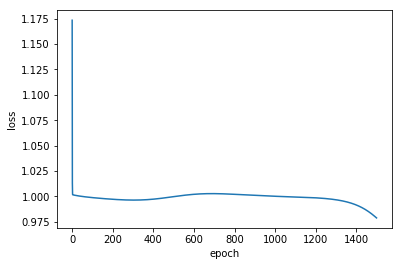

In [0]:
num_iterations = 1500
num_hidden_neurons = 3

# The four possible combination of two bits go as input,
# along with a bias which is always set to 1
# The input is organised as [A, B, bias] 
# Each row represents a sample

X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1.]]) 

# The corresponding output for each case

Y = np.array([[0],
              [1],
              [1],
              [0.]])

# This defines our XORnet and 
net = XORnet(X,Y,num_hidden_neurons)

# We store losses after each epoch here 
losses = np.zeros((num_iterations,1))

for i in range(num_iterations):
    loss = net.forward()
    losses[i] = loss
    net.backward()

print("Expected Output: \n",  (Y.T))
print("Current output :\n", net.output.T)

plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Expected Output: 
 [[0. 1. 1. 0.]]
Current output :
 [[0.01574132 0.97805582 0.97761318 0.01960546]]


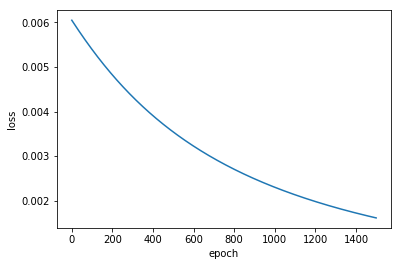

In [0]:
# We store losses after each epoch here 
losses = np.zeros((num_iterations,1))

for i in range(num_iterations):
    loss = net.forward()
    losses[i] = loss
    net.backward()

print("Expected Output: \n",  (Y.T))
print("Current output :\n", net.output.T)

plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Expected Output: 
 [[0. 1. 1. 0.]]
Current output :
 [[0.00793998 0.98887919 0.9886731  0.00989456]]


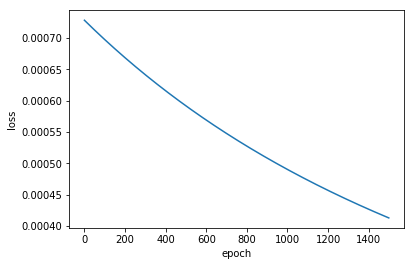

In [0]:
# We store losses after each epoch here 
losses = np.zeros((num_iterations,1))

for i in range(num_iterations):
    loss = net.forward()
    losses[i] = loss
    net.backward()

print("Expected Output: \n",  (Y.T))
print("Current output :\n", net.output.T)

plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [0]:
print (net)